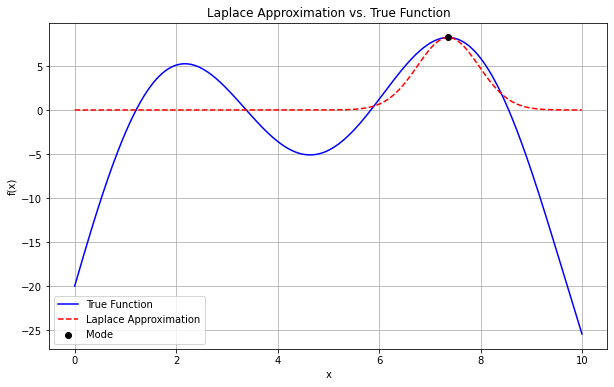

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

# Define the original function f(x)
def f(x):
    return -(x - 5)**2 + 10 * np.sin(x) + 5

# Numerically find the mode of f(x)
result = minimize(lambda x: -f(x), x0=np.array([5]), method='L-BFGS-B')
x_mode = result.x[0]

# Second derivative (Hessian) at the mode - corrected for Laplace approximation
def hessian_at_mode(x):
    return -2 + 10 * np.cos(x)

hessian = hessian_at_mode(x_mode)

# Correctly handle variance computation for Laplace approximation
variance = 1 / hessian

# Define a range of x values for plotting
x_values = np.linspace(0, 10, 400)

# Calculate the true function values
true_values = f(x_values)

# Calculate the Laplace approximation (Gaussian centered at the mode)
laplace_approximation = norm.pdf(x_values, loc=x_mode, scale=np.sqrt(variance))

# Normalizing Laplace approximation for comparison purposes
laplace_approximation_normalized = laplace_approximation * np.max(true_values) / np.max(laplace_approximation)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, true_values, label='True Function', color='blue')
plt.plot(x_values, laplace_approximation_normalized, label='Laplace Approximation', linestyle='--', color='red')
plt.scatter(x_mode, f(x_mode), color='black', zorder=5, label='Mode')
plt.title('Laplace Approximation vs. True Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()